<a href="https://colab.research.google.com/github/ritvik-chebolu/Twitter-Live-Sentiment-Analysis/blob/main/Twitter_Live_Feed_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tweepy
import re
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

# Access Tokens and API keys

Get these details from https://developer.twitter.com/en/portal/projects/ after signing in on Twitter.

In [ ]:
consumer_key = 'yK03Gdo8XVtILC6ivnoWTXv9L'
consumer_secret = '2XzPVlXjYy0vFQKBpe9EQCnzQbkTZIx0lRbLjZ9HyfenrFvy5x'
access_token = '240721202-llQLaY8YYuKveU0OvzX3617qV0f6gB8SjSJYHM3O'
access_token_secret = 'eTKXv1Txzv3K0hpChSDj3UZ4FmKoMsm9VKzKXJBSGlwNK'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [ ]:
public_tweets = api.search('Alexa', count = 500, lang = 'en')

#public_tweets = api.user_timeline(screen_name = 'Ken Jee')

i = 1
for tweet in public_tweets[0:10]:
  print('\n----Start of tweet----')
  print(str(i) + ') ' + tweet.text)
  analysis = TextBlob(tweet.text)
  print(analysis.sentiment)
  print('----End of tweet----\n')
  i = i + 1


----Start of tweet----
1) RT @TheEnemiesPE3: Alexa Bliss has one of the smoothest transitions from NXT to the main roster
Sentiment(polarity=0.16666666666666666, subjectivity=0.3333333333333333)
----End of tweet----


----Start of tweet----
2) RT @The_Blue_Brand: Daily Alexa Bliss pic! #WWE #WWERaw #SmackDown - RT and FAV for the Goddess 🎄🎅 Merry Christmas https://t.co/VgqqIua2iZ
Sentiment(polarity=0.0, subjectivity=0.0)
----End of tweet----


----Start of tweet----
3) RT @titasofaleian: WE LOVE YOU ALEXA!!!! https://t.co/KxWyq4Yqih
Sentiment(polarity=1.0, subjectivity=0.6)
----End of tweet----


----Start of tweet----
4) @JustJoshingNYC She looks fucking GORGEOUS, I'm about to let his ass know right the f**k now. Any other day, I'd Ki… https://t.co/bYZh36ewFx
Sentiment(polarity=0.2869047619047619, subjectivity=0.6035714285714285)
----End of tweet----


----Start of tweet----
5) RT @toti_ng_kdlex: SAMLY FOR TOP 2 PLEASEEE, LET'S MAKE IT HAPPEN. 

SAMANTHA IS LOVED BY TAONG BAYAN TOO, 

In [ ]:
df = pd.DataFrame([tweet.text for tweet in public_tweets], columns = ['Tweets'])

#df = pd.DataFrame([tweet.full_text for tweet in public_tweets], columns = ['Tweets']) ---- for the api.user_timeline code 


df.head()

,Tweets
0,RT @TheEnemiesPE3: Alexa Bliss has one of the ...
1,RT @The_Blue_Brand: Daily Alexa Bliss pic! #WW...
2,RT @titasofaleian: WE LOVE YOU ALEXA!!!! https...
3,"@JustJoshingNYC She looks fucking GORGEOUS, I'..."
4,"RT @toti_ng_kdlex: SAMLY FOR TOP 2 PLEASEEE, L..."


In [ ]:
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r':', '', text)
  return text

In [ ]:
df['Tweets'] = df['Tweets'].apply(cleanText)
df

,Tweets
0,Alexa Bliss has one of the smoothest transiti...
1,_Blue_Brand Daily Alexa Bliss pic! WWE WWERaw ...
2,WE LOVE YOU ALEXA!!!!
3,"She looks fucking GORGEOUS, I'm about to let ..."
4,"_ng_kdlex SAMLY FOR TOP 2 PLEASEEE, LET'S MAKE..."
...,...
95,agreed but like the movie?? the historical pe...
96,SONIK VIBE on Amazon Alexa Skill
97,The four that deserves the best. Welcome back...
98,good morning 🌞\n\n‘Alexa’ is still trending! G...


In [ ]:
# defining a function to get the tweet subjectivity (extent of positivity or negativity in the tweet)
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# defining a function to get the tweet polarity (extent of personal opinions in the tweet)
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# creating 2 new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Alexa Bliss has one of the smoothest transiti...,0.333333,0.166667
1,_Blue_Brand Daily Alexa Bliss pic! WWE WWERaw ...,0.000000,0.000000
2,WE LOVE YOU ALEXA!!!!,0.600000,1.000000
3,"She looks fucking GORGEOUS, I'm about to let ...",0.603571,0.286905
4,"_ng_kdlex SAMLY FOR TOP 2 PLEASEEE, LET'S MAKE...",0.650000,0.600000
...,...,...,...
95,agreed but like the movie?? the historical pe...,0.000000,0.000000
96,SONIK VIBE on Amazon Alexa Skill,0.000000,0.000000
97,The four that deserves the best. Welcome back...,0.312500,0.450000
98,good morning 🌞\n\n‘Alexa’ is still trending! G...,0.450000,0.537500


# Visualizing the Word Cloud

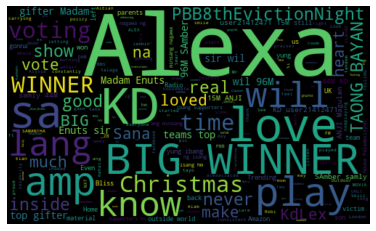

In [ ]:
# word cloud plot
all_words = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 42, max_font_size = 119).generate(all_words)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# defining a function to compute the positive, negative and neutral analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score > 0:
    return 'Positive'
  else:
    return 'Neutral'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Alexa Bliss has one of the smoothest transiti...,0.333333,0.166667,Positive
1,_Blue_Brand Daily Alexa Bliss pic! WWE WWERaw ...,0.000000,0.000000,Neutral
2,WE LOVE YOU ALEXA!!!!,0.600000,1.000000,Positive
3,"She looks fucking GORGEOUS, I'm about to let ...",0.603571,0.286905,Positive
4,"_ng_kdlex SAMLY FOR TOP 2 PLEASEEE, LET'S MAKE...",0.650000,0.600000,Positive
...,...,...,...,...
95,agreed but like the movie?? the historical pe...,0.000000,0.000000,Neutral
96,SONIK VIBE on Amazon Alexa Skill,0.000000,0.000000,Neutral
97,The four that deserves the best. Welcome back...,0.312500,0.450000,Positive
98,good morning 🌞\n\n‘Alexa’ is still trending! G...,0.450000,0.537500,Positive
